In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
file_path = "C:\\Users\\Administrator\\DS Project Portfolio\\cleaned_Sales_dataset.csv"
data = pd.read_csv(file_path, encoding='latin1')
data.sample(5)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,PHONE,ADDRESSLINE1,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
866,10226,24,100.00,5,3231.36,2004-02-26,Shipped,1,Feb,2004,...,7605558146,361 Furth Circle,San Diego,CA,91217,USA,Americas,Thompson,Valarie,Medium
1417,10148,25,60.26,6,1506.50,2003-09-11,Shipped,3,Sep,2003,...,02 9936 8555,201 Miller Street,North Sydney,NSW,2060,Australia,APAC,O'Hara,Anna,Small
907,10423,10,88.14,1,881.40,2005-05-30,In Process,2,May,2005,...,(02) 5554 67,Rue Joseph-Bens 532,Bruxelles,Brussels-Capital Region,B-1180,Belgium,EMEA,Dewey,Catherine,Small
1360,10312,39,56.85,1,2217.15,2004-10-21,Shipped,4,Oct,2004,...,4155551450,5677 Strong St.,San Rafael,CA,97562,USA,Americas,Nelson,Valarie,Small
1608,10315,35,100.00,6,4215.05,2004-10-29,Shipped,4,Oct,2004,...,40.67.8555,"67, rue des Cinquante Otages",Nantes,Pays de la Loire,44000,France,EMEA,Labrune,Janine,Medium


## DATA ANALYSIS TIME

**1. Sales Trends by Product Line and Territory:**
We want to analyze which product lines generate the highest sales across different territories (EMEA, APAC, Americas, Japan) and identify top-selling products within each product line.

In [17]:
# Step 1: Filter and Aggregate by PRODUCTLINE and TERRITORY
sales_by_productline_territory = data.groupby(['PRODUCTLINE', 'TERRITORY'])['SALES'].sum().reset_index()

# Step 2: Identify top-selling products within each PRODUCTLINE
top_selling_products = sales_by_productline_territory.groupby('PRODUCTLINE').apply(lambda x: x.loc[x['SALES'].idxmax()]).reset_index(drop=True)

# Display the results
print("Top-selling products by PRODUCTLINE and TERRITORY:")
top_selling_products[['PRODUCTLINE', 'TERRITORY', 'SALES']]

Top-selling products by PRODUCTLINE and TERRITORY:


,PRODUCTLINE,TERRITORY,SALES
0,Classic Cars,EMEA,2086994.66
1,Motorcycles,Americas,524549.19
2,Planes,EMEA,476122.91
3,Ships,EMEA,427264.68
4,Trains,EMEA,138506.18
5,Trucks and Buses,EMEA,498305.82
6,Vintage Cars,EMEA,848981.46


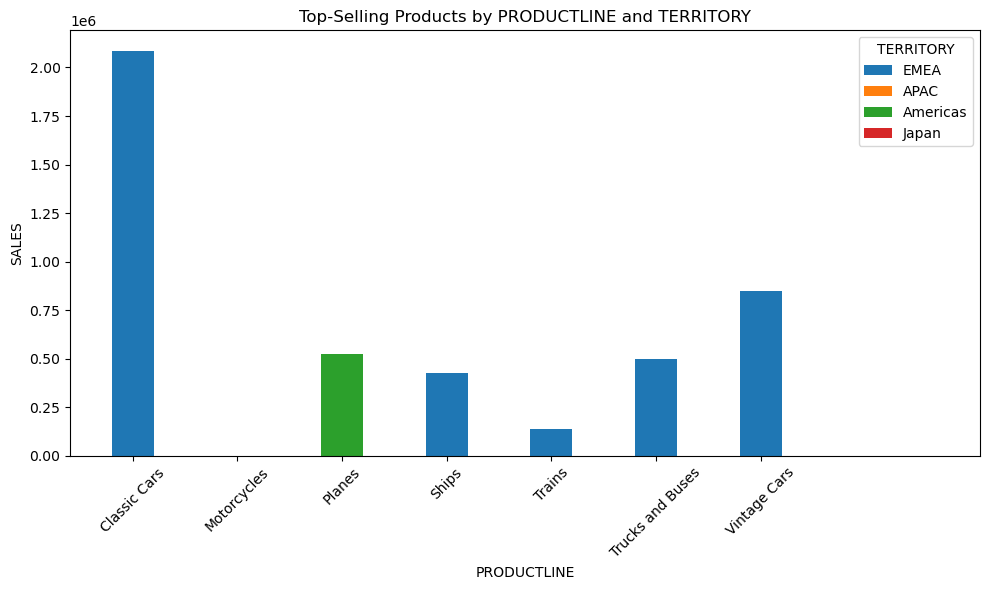

In [18]:
# Step 1: Filter and Aggregate by PRODUCTLINE and TERRITORY
sales_by_productline_territory = data.groupby(['PRODUCTLINE', 'TERRITORY'])['SALES'].sum().reset_index()

# Step 2: Identify top-selling products within each PRODUCTLINE
top_selling_products = sales_by_productline_territory.groupby('PRODUCTLINE').apply(lambda x: x.loc[x['SALES'].idxmax()]).reset_index(drop=True)

# Visualization
plt.figure(figsize=(10, 6))
colors = {'EMEA': 'tab:blue', 'APAC': 'tab:orange', 'Americas': 'tab:green', 'Japan': 'tab:red'}  # Color mapping for territories
bar_width = 0.4
padding = 0.1
index = range(len(top_selling_products))  # Index based on number of PRODUCTLINE categories

# Plotting bars for each territory
for i, territory in enumerate(['EMEA', 'APAC', 'Americas', 'Japan']):
    sales_data = top_selling_products[top_selling_products['TERRITORY'] == territory]
    # Ensure sales_data has the same length as index
    sales_data = sales_data.reindex(index, fill_value=0)  # Fill missing values with 0 if any
    plt.bar([x + i * (bar_width + padding) for x in index], sales_data['SALES'], width=bar_width, label=territory, color=colors[territory])

plt.xlabel('PRODUCTLINE')
plt.ylabel('SALES')
plt.title('Top-Selling Products by PRODUCTLINE and TERRITORY')
plt.xticks(index, top_selling_products['PRODUCTLINE'], rotation=45)
plt.legend(title='TERRITORY')
plt.tight_layout()
plt.show()

#### This shows that most of the market sales comes from the EMEA 

### Lets dig a bit more:
1. Let's see the top regions by Sales
2. Let's see the top countries by Sales

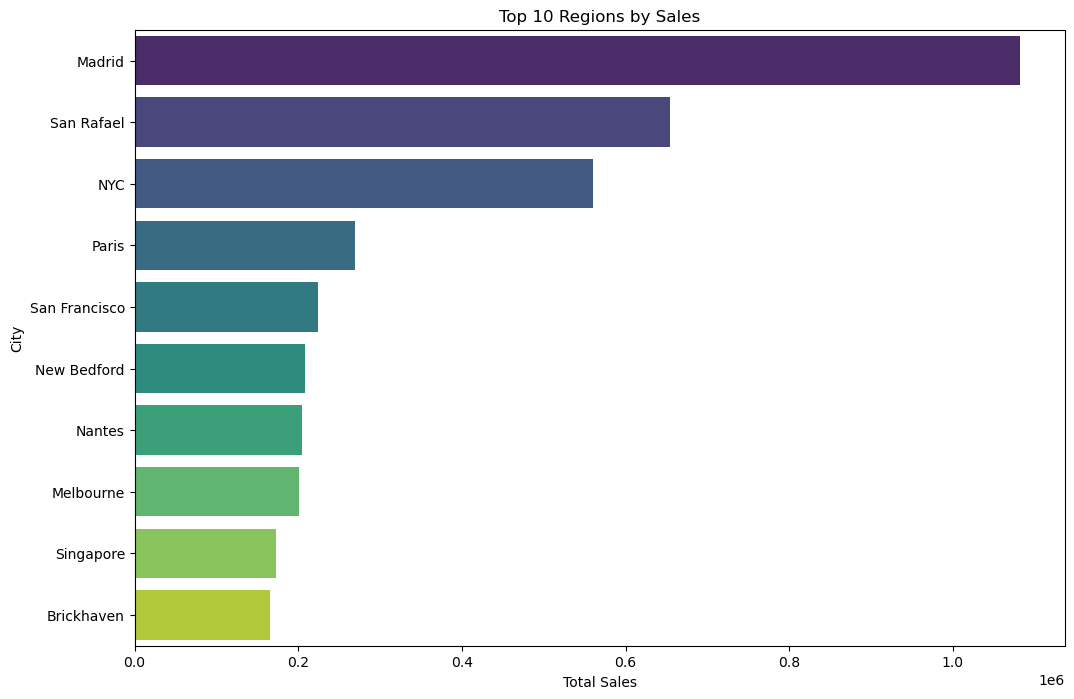

In [20]:
# Aggregate sales by City, State, Country, and Territory
geo_sales = data.groupby(['CITY', 'STATE', 'COUNTRY', 'TERRITORY'])['SALES'].sum().reset_index()

# Sort the data by Sales in descending order
geo_sales_sorted = geo_sales.sort_values(by='SALES', ascending=False)

# Let's look at the top 10 regions by sales
top_geo_sales = geo_sales_sorted.head(10)

# Plotting the top 10 regions by sales
plt.figure(figsize=(12, 8))
sns.barplot(x='SALES', y='CITY', data=top_geo_sales, palette='viridis')
plt.title('Top 10 Regions by Sales')
plt.xlabel('Total Sales')
plt.ylabel('City')
plt.show()


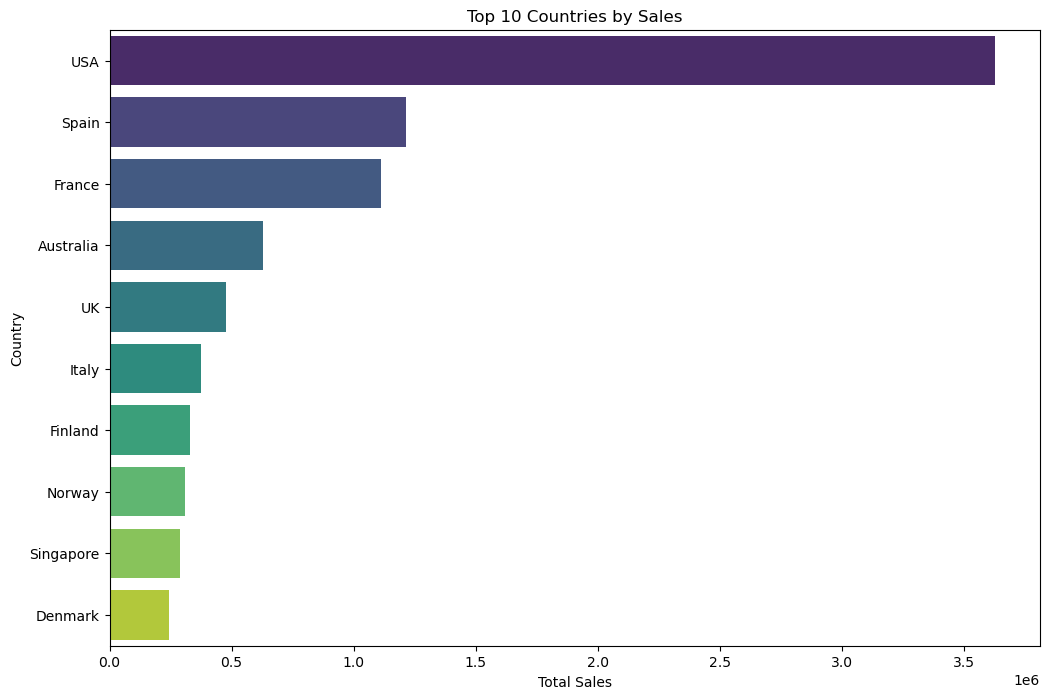

In [21]:
# Additionally, we can plot by Country or State for a broader view
country_sales = data.groupby('COUNTRY')['SALES'].sum().sort_values(ascending=False).reset_index()

# Plotting the top 10 countries by sales
plt.figure(figsize=(12, 8))
sns.barplot(x='SALES', y='COUNTRY', data=country_sales.head(10), palette='viridis')
plt.title('Top 10 Countries by Sales')
plt.xlabel('Total Sales')
plt.ylabel('Country')
plt.show()

**2. Seasonal Analysis:**

Seasonal analysis of the sales dataset, utilizing `ORDERDATE`, `QTR_ID`, `MONTH_ID`, and `YEAR_ID`, serves to uncover recurring patterns in sales across quarters, months, and years. This analysis provides critical insights for inventory management, forecasting future sales trends, optimizing marketing strategies tailored to peak seasons, and efficiently planning resources like staffing and production schedules. 

By understanding seasonal variations, businesses can benchmark performance, make informed decisions on product launches and pricing strategies, and gain deeper insights into customer behaviors and preferences throughout the year. Overall, seasonal analysis facilitates proactive decision-making that enhances operational efficiency, improves customer satisfaction, and drives sustainable business growth.

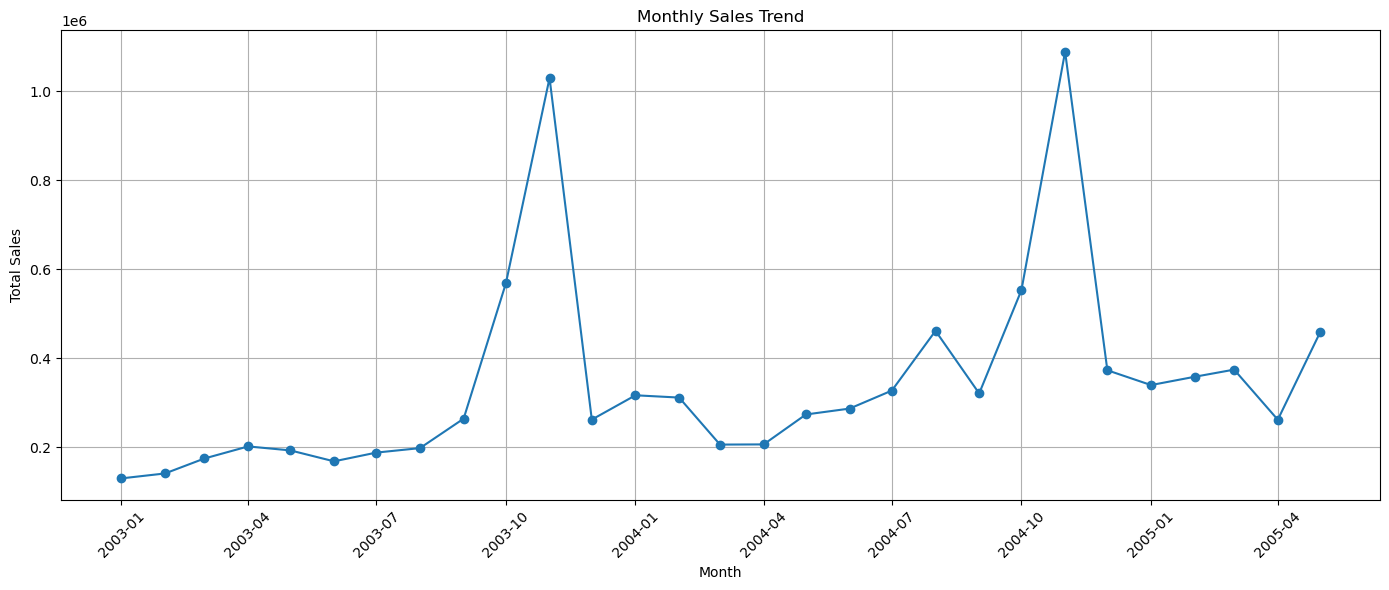

In [22]:
monthly_sales = data.groupby(['YEAR_ID', 'MONTH_ID'])['SALES'].sum().reset_index()

# Creating a 'Year-Month' column for better visualization
monthly_sales['Year-Month'] = pd.to_datetime(monthly_sales['YEAR_ID'].astype(str) + '-' + monthly_sales['MONTH_ID'].astype(str).str.zfill(2) + '-01')

# Sorting the data by 'Year-Month'
monthly_sales = monthly_sales.sort_values('Year-Month')

# Plotting the Monthly Sales Trend
plt.figure(figsize=(14, 6))
plt.plot(monthly_sales['Year-Month'], monthly_sales['SALES'], marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

It is obvious that the peak time is around the last quarter of the year

**3. Top Performing Products**

Top Sales by Product Line:
        PRODUCTLINE       SALES
0      Classic Cars  3919615.66
6      Vintage Cars  1903150.84
1       Motorcycles  1166388.34
5  Trucks and Buses  1127789.84
2            Planes   975003.57
3             Ships   714437.13
4            Trains   226243.47


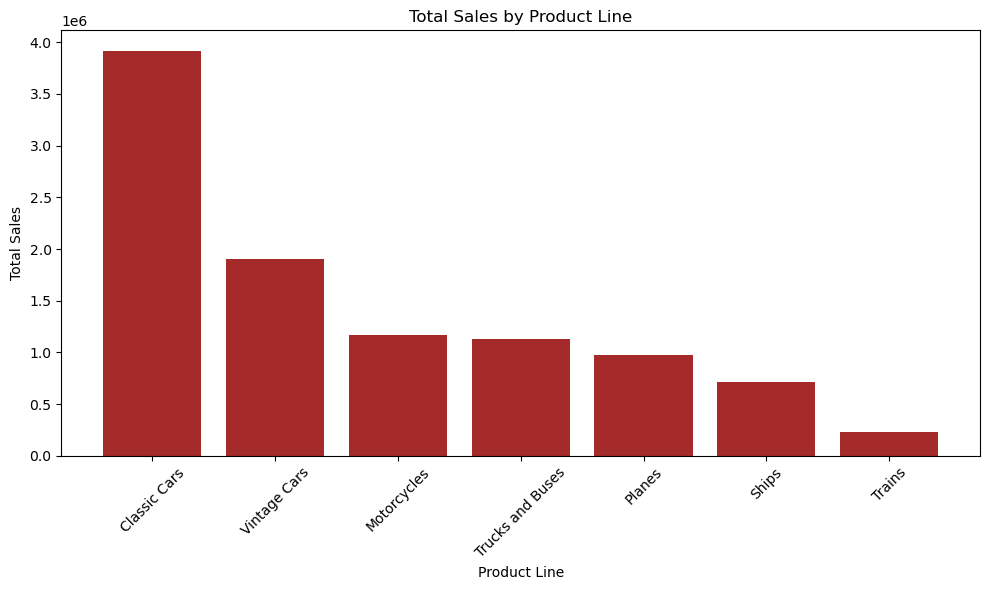

In [23]:
# Aggregate sales by product line
product_line_sales = data.groupby('PRODUCTLINE')['SALES'].sum().reset_index()
product_line_sales = product_line_sales.sort_values(by='SALES', ascending=False)

# Display results
print("Top Sales by Product Line:")
print(product_line_sales)

# Plot the results
plt.figure(figsize=(10, 6))
plt.bar(product_line_sales['PRODUCTLINE'], product_line_sales['SALES'], color='brown')
plt.xlabel('Product Line')
plt.ylabel('Total Sales')
plt.title('Total Sales by Product Line')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to fit labels
plt.show()

Based on the dataset given, from the visual above Classic cars are the top performing product in this company. Hence, most capital should be invested the order of sales for each product as seen in the chart above

**4. Customer Segmentation**
Customer Lifetime Value (CLV) is a crucial metric that estimates the total revenue a company can expect from a customer over their entire relationship. Analyzing CLV helps businesses to:

- Identify High-Value Customers: Focus marketing efforts and resources on customers who generate the most revenue.
- Improve Customer Retention: Develop strategies to increase the longevity and value of customer relationships.
- Optimize Marketing Spend: Allocate budget more effectively by understanding which customer segments are most profitable.
- Enhance Customer Segmentation: Segment customers based on their value, enabling more personalized and targeted approaches.

In [24]:
data_copy = data.copy()

# Calculate total sales per customer
customer_sales = data_copy.groupby('CUSTOMERNAME')['SALES'].sum().reset_index()

# Calculate first and last purchase dates for each customer
customer_dates = data_copy.groupby('CUSTOMERNAME')['ORDERDATE'].agg(['min', 'max']).reset_index()
customer_dates.columns = ['CUSTOMERNAME', 'FirstPurchaseDate', 'LastPurchaseDate']

# Merge sales and dates data
customer_lifetime = pd.merge(customer_sales, customer_dates, on='CUSTOMERNAME')

# Calculate Customer Lifetime Value (CLV)
customer_lifetime['CLV'] = customer_lifetime['SALES']

# Display results
print("Customer Lifetime Value (CLV):")
customer_lifetime


Customer Lifetime Value (CLV):


,CUSTOMERNAME,SALES,FirstPurchaseDate,LastPurchaseDate,CLV
0,"AV Stores, Co.",157807.81,2003-03-18,2004-11-17,157807.81
1,Alpha Cognac,70488.44,2003-07-04,2005-03-28,70488.44
2,Amica Models & Co.,94117.26,2004-08-17,2004-09-09,94117.26
3,"Anna's Decorations, Ltd",153996.13,2003-09-11,2005-03-09,153996.13
4,Atelier graphique,24179.96,2003-05-20,2004-11-25,24179.96
...,...,...,...,...,...
87,"Vida Sport, Ltd",117713.56,2004-02-22,2004-08-30,117713.56
88,Vitachrome Inc.,88041.26,2003-01-10,2004-11-05,88041.26
89,"Volvo Model Replicas, Co",75754.88,2003-03-24,2004-11-19,75754.88
90,West Coast Collectables Co.,46084.64,2003-12-01,2004-01-29,46084.64


In [25]:
# Sorting by CLV and displaying the top customers
top_customers = customer_lifetime.sort_values(by='CLV', ascending=False)
print("\nTop Customers by CLV:")
top_customers


Top Customers by CLV:


,CUSTOMERNAME,SALES,FirstPurchaseDate,LastPurchaseDate,CLV
33,Euro Shopping Channel,912294.11,2003-01-31,2005-05-31,912294.11
55,Mini Gifts Distributors Ltd.,654858.06,2003-03-26,2005-05-29,654858.06
6,"Australian Collectors, Co.",200995.41,2003-04-29,2004-11-29,200995.41
58,Muscle Machine Inc,197736.94,2003-06-03,2004-12-01,197736.94
44,La Rochelle Gifts,180124.90,2004-07-23,2005-05-31,180124.90
...,...,...,...,...,...
69,Royale Belge,33440.10,2003-04-11,2005-01-10,33440.10
50,Microscale Inc.,33144.93,2004-04-20,2004-11-03,33144.93
10,Auto-Moto Classics Inc.,26479.26,2003-06-16,2004-12-03,26479.26
4,Atelier graphique,24179.96,2003-05-20,2004-11-25,24179.96


In [26]:
# Summing total sales per customer to get CLV
customer_lifetime = data_copy.groupby('CUSTOMERNAME')['SALES'].sum().reset_index()
customer_lifetime.columns = ['CUSTOMERNAME', 'CLV']

# Sort customers by CLV in descending order
customer_lifetime = customer_lifetime.sort_values(by='CLV', ascending=False)

total_revenue = customer_lifetime['CLV'].sum()

# Calculate cumulative revenue percentage
customer_lifetime['Cumulative_Rev'] = customer_lifetime['CLV'].cumsum() / total_revenue * 100

# Define the threshold for top X% customers (e.g., top 10%)
threshold = 10

# Get the index where the cumulative revenue crosses the threshold
top_customers_index = customer_lifetime[customer_lifetime['Cumulative_Rev'] <= threshold].index.max()

# Calculate X% and Y%
top_X_percent_customers = (top_customers_index + 1) / len(customer_lifetime) * 100
top_Y_percent_revenue = customer_lifetime.iloc[top_customers_index]['Cumulative_Rev']

top_customer = customer_lifetime.iloc[0]
low_clv_customer = customer_lifetime.iloc[-1]

# Extract details
top_customer_name = top_customer['CUSTOMERNAME']
top_clv_value = top_customer['CLV']

low_customer_name = low_clv_customer['CUSTOMERNAME']
low_clv_value = low_clv_customer['CLV']


In [27]:
print(f"The CLV analysis of {len(customer_lifetime)} customers reveals that the top {round(top_X_percent_customers, 1)}% of customers contribute {round(top_Y_percent_revenue, 1)}% to the total revenue. {top_customer_name}, with a CLV of ${top_clv_value:,.2f}, is the highest contributor. Focusing on these high-value customers with targeted retention strategies can further boost their impact.")

print(f"On the other hand, customers like {low_customer_name}, with a CLV of ${low_clv_value:,.2f}, present growth opportunities. By implementing personalized offers, their lifetime value could be increased, contributing to overall profitability.")

The CLV analysis of 92 customers reveals that the top 37.0% of customers contribute 59.6% to the total revenue. Euro Shopping Channel, with a CLV of $912,294.11, is the highest contributor. Focusing on these high-value customers with targeted retention strategies can further boost their impact.
On the other hand, customers like Boards & Toys Co., with a CLV of $9,129.35, present growth opportunities. By implementing personalized offers, their lifetime value could be increased, contributing to overall profitability.


**Report on the CLV analysis:**

The CLV analysis of 92 customers reveals that the top 37.0% of customers contribute 59.6% to the total revenue. 

Euro Shopping Channel, with a CLV of $912,294.11, is the highest contributor. Focusing on these high-value customers with targeted retention strategies can further boost their impact.

On the other hand, customers like Boards & Toys Co., with a CLV of $9,129.35, present growth opportunities. By implementing personalized offers, their lifetime value could be increased, contributing to overall profitability.

**5. Profitability Analysis**

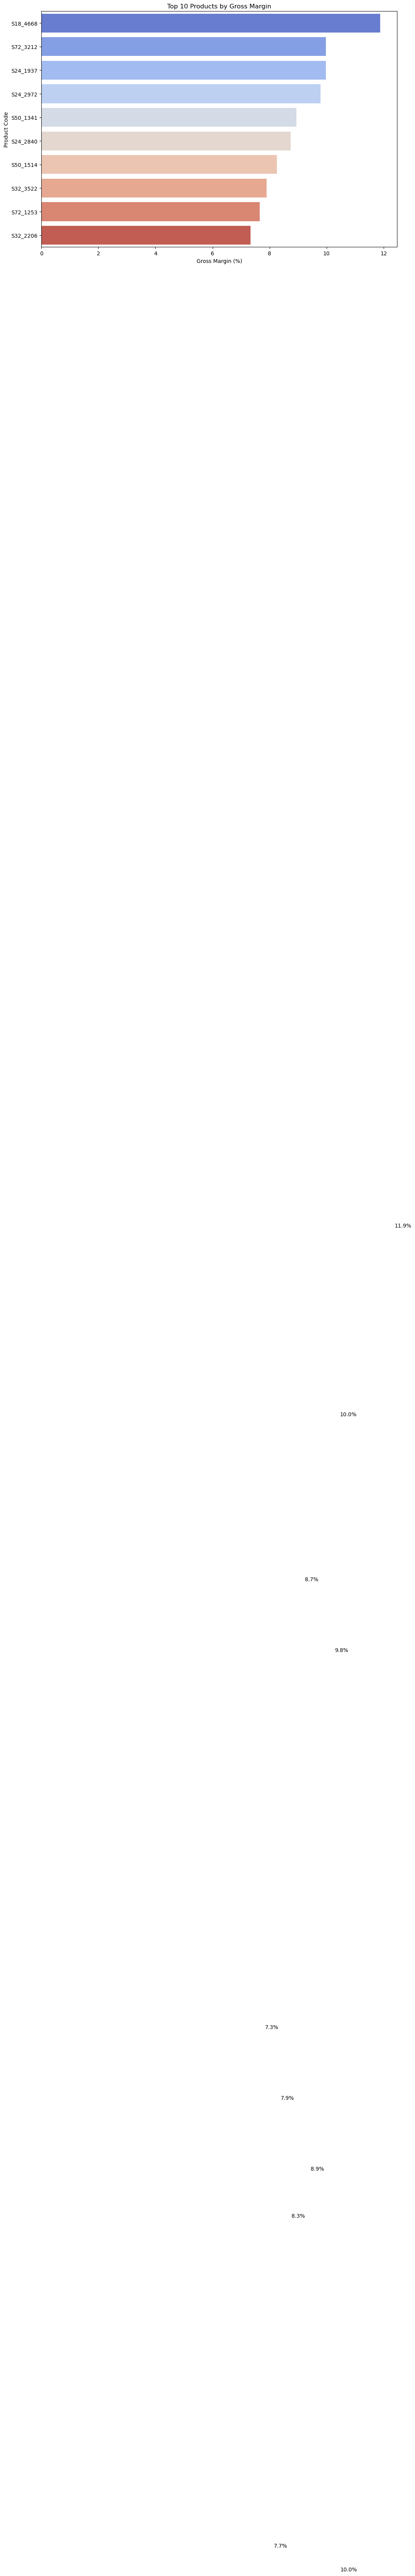

In [28]:
# Calculate Gross Margin for each product
data['GROSS_MARGIN'] = ((data['PRICEEACH'] - data['MSRP']) / data['PRICEEACH']) * 100

# Aggregate gross margin by PRODUCTCODE and PRODUCTLINE (or any other relevant columns)
gross_margin_summary = data.groupby(['PRODUCTCODE', 'PRODUCTLINE'])['GROSS_MARGIN'].mean().reset_index()

# Sort by Gross Margin in descending order
gross_margin_summary_sorted = gross_margin_summary.sort_values(by='GROSS_MARGIN', ascending=False)

# Plotting the top products by Gross Margin
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='GROSS_MARGIN', y='PRODUCTCODE', data=gross_margin_summary_sorted.head(10), palette='coolwarm')

# Adding percentage labels above the bars
for index, row in gross_margin_summary_sorted.head(10).iterrows():
    ax.text(row['GROSS_MARGIN'] + 0.5, index, f'{row["GROSS_MARGIN"]:.1f}%', ha='left', va='center')

plt.title('Top 10 Products by Gross Margin')
plt.xlabel('Gross Margin (%)')
plt.ylabel('Product Code')
plt.show()